In [11]:
# 필요한 모듈? 라이브러리? 불러오기
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import pandas as pd
from datetime import datetime

In [2]:
# font 설정 D2Coding
d2_path = "./ref/D2Coding-Ver1.3.2-20180524.ttf"
fm.fontManager.addfont(d2_path)
matplotlib.rcParams["font.family"] = "D2Coding"

In [12]:
# 데이터 파일 불러오기
file_path = "./ref/온라인쇼핑몰_판매매체별_상품군별거래액_20250227153229.csv"
ori = pd.read_csv(file_path, encoding="EUC-KR")  # 판다스로 file_path 읽어오기
ori.columns = ["category", "date", "internet", "mobile"]  # 컬럼명 설정
ori.head()

,category,date,internet,mobile
0,컴퓨터 및 주변기기,2017.01,288391,133993
1,컴퓨터 및 주변기기,2017.02,329143,146200
2,컴퓨터 및 주변기기,2017.03,322089,151262
3,컴퓨터 및 주변기기,2017.04,251604,116675
4,컴퓨터 및 주변기기,2017.05,241871,109053


In [13]:
# 2024.11 / 2024.12 뒤에 ' p)' 없애기
print("수정전")
print(ori['date'].tail())
ori['date'] = ori['date'].map(lambda x: x.rstrip(' p)'))
print("수정전")
print(ori['date'].tail())

수정전
2203       2024.08
2204       2024.09
2205       2024.10
2206    2024.11 p)
2207    2024.12 p)
Name: date, dtype: object
수정전
2203    2024.08
2204    2024.09
2205    2024.10
2206    2024.11
2207    2024.12
Name: date, dtype: object


In [14]:
# date 부분 문자열을 날짜형식으로 변환
ori['date'] = pd.to_datetime(ori["date"], format = '%Y.%m')
ori.dtypes
ori.head()

,category,date,internet,mobile
0,컴퓨터 및 주변기기,2017-01-01,288391,133993
1,컴퓨터 및 주변기기,2017-02-01,329143,146200
2,컴퓨터 및 주변기기,2017-03-01,322089,151262
3,컴퓨터 및 주변기기,2017-04-01,251604,116675
4,컴퓨터 및 주변기기,2017-05-01,241871,109053


In [17]:
# ori를 ex1_data에 복사
# 이후 obj 카테고리에 있는 것만 추출
ex1_data = ori.copy()
obj = ['음식서비스']
ex1_data = ex1_data[ex1_data['category'].isin(obj)]
ex1_data.sample(5)

,category,date,internet,mobile
1983,음식서비스,2022-04-01,43815,2091751
1967,음식서비스,2020-12-01,87035,2111121
1937,음식서비스,2018-06-01,38204,374849
1930,음식서비스,2017-11-01,34430,246210
1949,음식서비스,2019-06-01,52192,722286


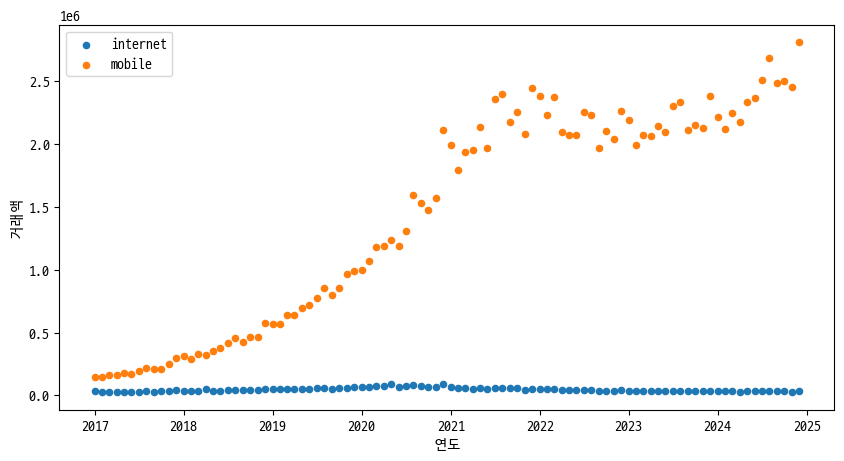

In [20]:
# 그래프 출력
fig, ax = plt.subplots(figsize=(10,5))
intmob = ['internet', 'mobile']
category = intmob
for ran in category:
    category_data = ex1_data[ex1_data['category'] == obj[0]]
    x_data = category_data['date']
    y_data = category_data[ran]
    ax.scatter(x_data, y_data, s = 20, label = ran)

ax.set_xlabel("연도")
ax.set_ylabel("거래액")
ax.legend(loc="best")
plt.show()